In [290]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
data_e = pd.read_csv('formatted.csv')
data_e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6627 entries, 0 to 6626
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   severity        6627 non-null   int64  
 1   peop_in_car     6627 non-null   int64  
 2   exp             6627 non-null   int64  
 3   city            6627 non-null   int64  
 4   highway         6627 non-null   int64  
 5   gender          6627 non-null   int64  
 6   speed           6627 non-null   int64  
 7   op_way          6627 non-null   int64  
 8   give_way        6627 non-null   int64  
 9   red_light       6627 non-null   int64  
 10  bad_grip        6627 non-null   int64  
 11  bad_visibility  6627 non-null   int64  
 12  houses          6627 non-null   int64  
 13  yard_exit       6627 non-null   int64  
 14  r_roadcross     6627 non-null   int64  
 15  nr_roadcross    6627 non-null   int64  
 16  bridge          6627 non-null   int64  
 17  industry        6627 non-null   i

In [299]:
data_p = data_e.copy()

In [300]:

# Удаление дубликатов по столбцу 'Category', оставляя только уникальные значения
data_p = data_p.drop_duplicates(subset=['highway', 'gender', 'peop_in_car', 'exp', 'speed', 'rwd', 'awd', 'fwd',
                                        'op_way', 'bad_grip', 'bad_visibility', 'mall', 'heavy', 'small', 'spacious',
                                           'medium', 'industry', 'bridge', 'nr_roadcross', 'r_roadcross', 'yard_exit', 'houses', 'city', ])

data_p = data_p.drop(["bridge", "yard_exit"], axis=1)
data_p.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5450 entries, 0 to 6626
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   severity        5450 non-null   int64  
 1   peop_in_car     5450 non-null   int64  
 2   exp             5450 non-null   int64  
 3   city            5450 non-null   int64  
 4   highway         5450 non-null   int64  
 5   gender          5450 non-null   int64  
 6   speed           5450 non-null   int64  
 7   op_way          5450 non-null   int64  
 8   give_way        5450 non-null   int64  
 9   red_light       5450 non-null   int64  
 10  bad_grip        5450 non-null   int64  
 11  bad_visibility  5450 non-null   int64  
 12  houses          5450 non-null   int64  
 13  r_roadcross     5450 non-null   int64  
 14  nr_roadcross    5450 non-null   int64  
 15  industry        5450 non-null   int64  
 16  mall            5450 non-null   int64  
 17  rwd             5450 non-null   int64 

In [301]:
# Разделение на тестовую и обучающую выборку
X = data_p.drop(["severity"], axis=1)
Y = data_p.severity
Y = data_p['severity']

X_final = X.copy()
Y_final = Y.copy()

In [315]:
import pickle
features = X.columns
pickle.dump(features, open('features.pickle', 'wb'))

In [316]:
features

Index(['peop_in_car', 'exp', 'city', 'highway', 'gender', 'speed', 'op_way',
       'give_way', 'red_light', 'bad_grip', 'bad_visibility', 'houses',
       'r_roadcross', 'nr_roadcross', 'industry', 'mall', 'rwd', 'awd', 'fwd',
       'weight', 'power', 'vehicle_age', 'month', 'd_week', 'time_of_day',
       'distance', 'medium', 'spacious', 'heavy', 'small'],
      dtype='object')

In [303]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

# ОБУЧЕНИЕ 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
print(f'Train Reg: {X_train.shape} \n Test Reg: {X_test.shape}')
reg_feature_names = X_train.columns.tolist()

Train Reg: (4360, 30) 
 Test Reg: (1090, 30)


In [304]:
import seaborn as sns
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score, balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

palette=sns.color_palette('gnuplot')

def rate(Y_test, Y_pred):
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f"Accuracy: {round(accuracy*100,3)}%\n")

    r2 = r2_score(Y_test, Y_pred)
    print(f"R2: {r2}")

# График
def graph(X_test, y_val, predictions):
    results_df = X_test.copy()  # Копируем тестовые данные
    results_df['Актуальные'] = y_val.values  # Добавляем реальные значения
    results_df['Предсказание'] = predictions  # Добавляем предсказанные значения

    plt.figure(figsize=(10, 6))

    graph_df = results_df[["Актуальные", "Предсказание"]]

    # Строим график распределения для актуальных значений
    sns.countplot(x='Актуальные', data=graph_df, color='blue', label='Актуальные', alpha=0.6)

    # Строим график распределения для предсказанных значений
    sns.countplot(x='Предсказание', data=graph_df, color='orange', label='Предсказание', alpha=0.6)

    # Добавляем заголовок и метки
    plt.title('Промахи в предсказаниях')
    plt.xlabel('Severity')
    plt.ylabel('Количество')
    plt.xticks(ticks=[0, 1, 2], labels=[1, 2, 3])  # Устанавливаем метки для Severity от 1 до 4
    plt.legend()

    # Показываем график
    plt.show()

## XGB Classification

              precision    recall  f1-score   support

           0       0.61      0.80      0.69       542
           1       0.52      0.38      0.44       427
           2       0.51      0.31      0.38       121

    accuracy                           0.58      1090
   macro avg       0.55      0.49      0.51      1090
weighted avg       0.57      0.58      0.56      1090

balanced_accuracy: 0.4942403656912486
roc_ovo_macro: 0.7669443139647879
roc_ovr_weighted: 0.7225161465968701


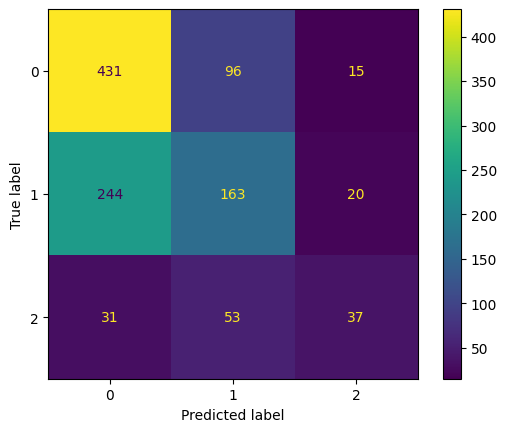

In [308]:
from xgboost.sklearn import XGBClassifier

# XGB Classification
# https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn
xgb_cla = XGBClassifier(learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, subsample=0.7, eval_metric='mlogloss', random_state=0)
eval_set = [(X_train, Y_train), (X_test, Y_test)]
xgb_cla.fit(X_train, Y_train, eval_set=eval_set, verbose=False)
xgb_cla_predictions = xgb_cla.predict(X_test)
xgb_cla_results = classification_report(Y_test, xgb_cla_predictions, zero_division=True, output_dict=True)

# Confusion matrix and Classification report
ConfusionMatrixDisplay.from_estimator(xgb_cla,X_test,Y_test)
print(classification_report(Y_test, xgb_cla_predictions, zero_division=True))

# balanced_accuracy
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html#sklearn.metrics.balanced_accuracy_score
xgb_cla_balanced_accuracy = balanced_accuracy_score(Y_test, xgb_cla_predictions)
print(f'balanced_accuracy: {xgb_cla_balanced_accuracy}')

# ROC_AUC score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
xgb_cla_roc_ovo_macro = roc_auc_score(Y_test, xgb_cla.predict_proba(X_test), multi_class='ovo', average='macro') #Insensitive to class imbalance when average == 'macro'
xgb_cla_roc_ovr_weighted = roc_auc_score(Y_test, xgb_cla.predict_proba(X_test), multi_class='ovr', average='weighted') #Sensitive to class imbalance even when average == 'macro'
print(f"roc_ovo_macro: {xgb_cla_roc_ovo_macro}") 
print(f"roc_ovr_weighted: {xgb_cla_roc_ovr_weighted}")

Точность на тестовых данных с XGBoost: 57.89%


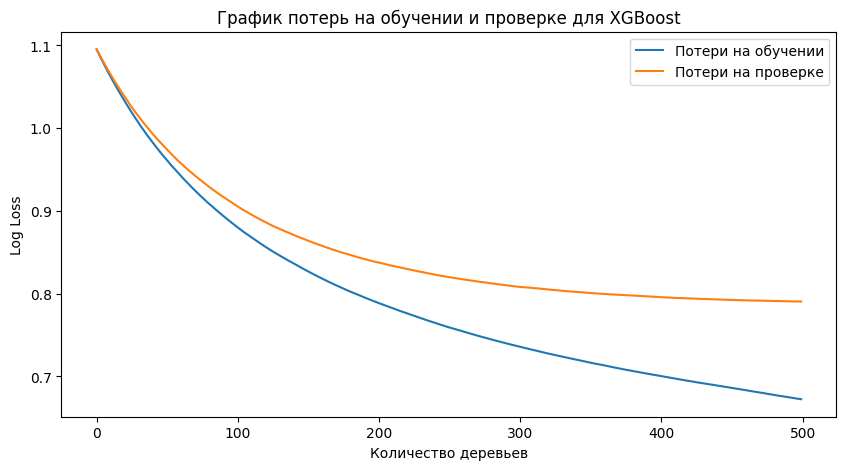

In [309]:
# Получение данных о процессе обучения
results = xgb_cla.evals_result()

# Визуализация метрик потерь
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(epochs)
y_pred = xgb_cla.predict(X_test)

accuracy = accuracy_score(Y_test, xgb_cla_predictions)
print(f'Точность на тестовых данных с XGBoost: {accuracy * 100:.2f}%')

# График логарифмических потерь
plt.figure(figsize=(10, 5))
plt.plot(x_axis, results['validation_0']['mlogloss'], label='Потери на обучении')
plt.plot(x_axis, results['validation_1']['mlogloss'], label='Потери на проверке')
plt.xlabel('Количество деревьев')
plt.ylabel('Log Loss')
plt.title('График потерь на обучении и проверке для XGBoost')
plt.legend()
plt.show()

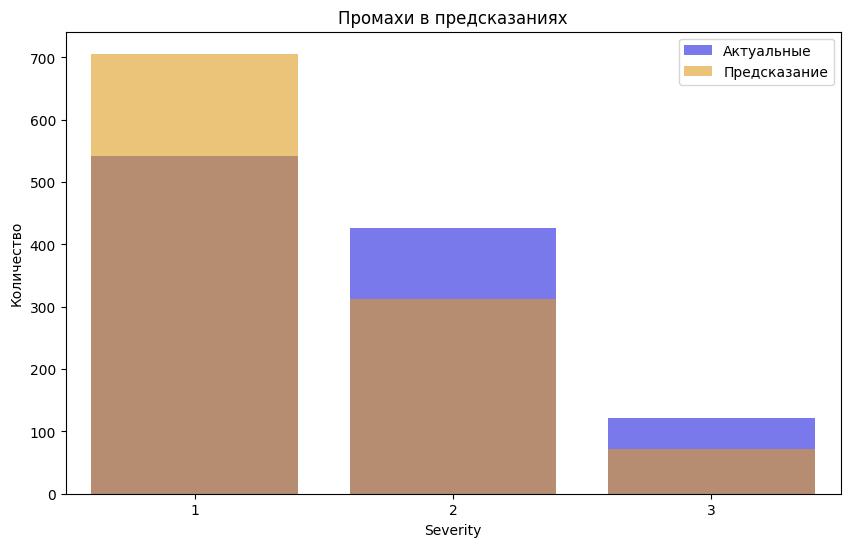

In [310]:
graph(X_test, Y_test, xgb_cla_predictions)

In [307]:
from xgboost.sklearn import XGBRegressor

# XGB Regression
xgbr_pipe = make_pipeline(XGBRegressor(random_state=0))
xgbr_param = {
    'xgbregressor__learning_rate': [0.01, 0.1, 0.5, 0.7, 1],
    'xgbregressor__max_depth': [3, 5, 7, 20, 30, 50],
    'xgbregressor__n_estimators': [50, 100, 300, 500],
    'xgbregressor__subsample': [0.5, 0.7, 1.0],
    'xgbregressor__min_child_weight': [1, 3, 10],
}

xgbr_search = GridSearchCV(xgbr_pipe, 
                         xgbr_param,
                         scoring="neg_root_mean_squared_error",
                         n_jobs=-1,
                         cv = 5)
xgbr_search.fit(X_train, Y_train)
print(f'Best Params: {xgbr_search.best_params_} \nBest score: {-(xgbr_search.best_score_)}')

Best Params: {'xgbregressor__learning_rate': 0.01, 'xgbregressor__max_depth': 5, 'xgbregressor__min_child_weight': 3, 'xgbregressor__n_estimators': 500, 'xgbregressor__subsample': 0.7} 
Best score: 0.5988512483034955


## Decision Tree Classification

              precision    recall  f1-score   support

           0       0.59      0.72      0.65       542
           1       0.48      0.40      0.43       427
           2       0.44      0.27      0.34       121

    accuracy                           0.54      1090
   macro avg       0.50      0.46      0.47      1090
weighted avg       0.53      0.54      0.53      1090

balanced_accuracy: 0.4639196828417081
roc_ovo_macro: 0.7065997413753143
roc_ovr_weighted: 0.6627719266136911


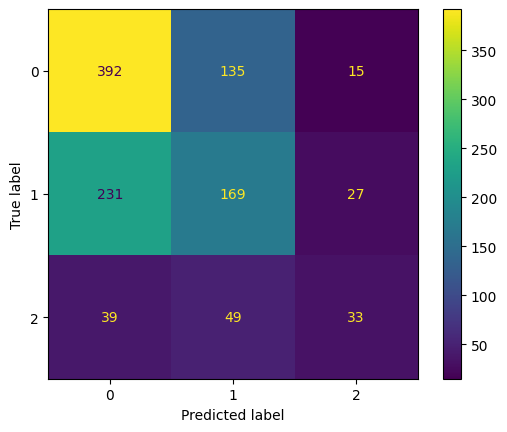

In [317]:
from sklearn.metrics import classification_report, roc_auc_score, balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classification
dt_cla = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=20, min_samples_split=2, min_weight_fraction_leaf=0.0)
dt_cla.fit(X_train, Y_train)
dt_cla_predictions = dt_cla.predict(X_test)
dt_cla_results = classification_report(Y_test, dt_cla_predictions, zero_division=True, output_dict=True)

# Confusion matrix and Classification report
ConfusionMatrixDisplay.from_estimator(dt_cla,X_test,Y_test)
print(classification_report(Y_test, dt_cla_predictions, zero_division=True))

# balanced_accuracy
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html#sklearn.metrics.balanced_accuracy_score
dt_cla_balanced_accuracy = balanced_accuracy_score(Y_test, dt_cla_predictions)
print(f'balanced_accuracy: {dt_cla_balanced_accuracy}')

# ROC_AUC score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
dt_cla_roc_ovo_macro = roc_auc_score(Y_test, dt_cla.predict_proba(X_test), multi_class='ovo', average='macro') #Insensitive to class imbalance when average == 'macro'
dt_cla_roc_ovr_weighted = roc_auc_score(Y_test, dt_cla.predict_proba(X_test), multi_class='ovr', average='weighted') #Sensitive to class imbalance even when average == 'macro'
print(f"roc_ovo_macro: {dt_cla_roc_ovo_macro}") 
print(f"roc_ovr_weighted: {dt_cla_roc_ovr_weighted}")

Text(0, 0.5, 'Features')

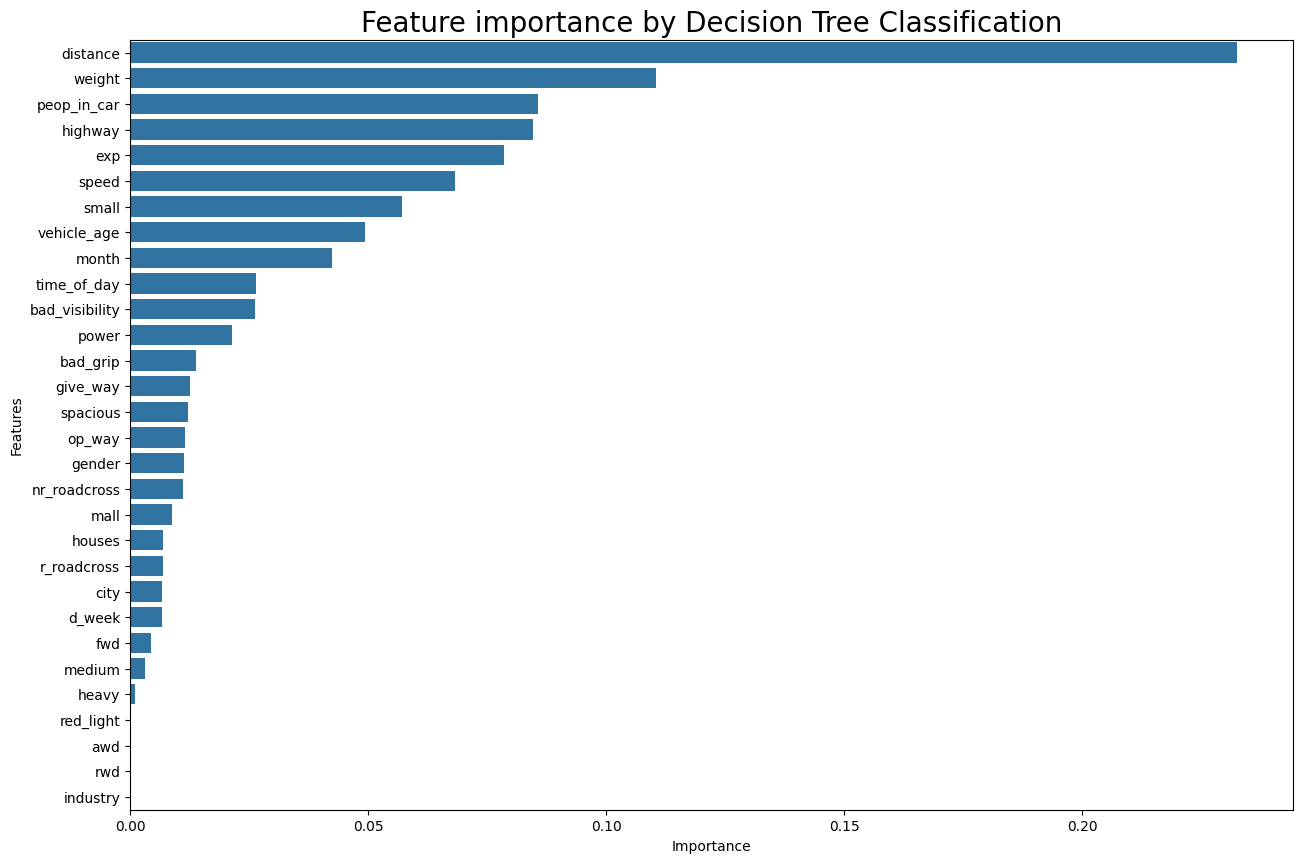

In [318]:
# Get the feature importance as a dataframe  
dt_cla_importances_df = pd.DataFrame(pd.Series(dt_cla.feature_importances_, index=X.columns), columns=['Importance']).sort_values('Importance', ascending=False)
# Visualize the feature importance of the trained tree
plt.figure(figsize=(15, 10))
missing_value_graph = sns.barplot(y = dt_cla_importances_df.index, x = "Importance", data=dt_cla_importances_df, orient="h")
missing_value_graph.set_title("Feature importance by Decision Tree Classification", fontsize = 20)
missing_value_graph.set_ylabel("Features")

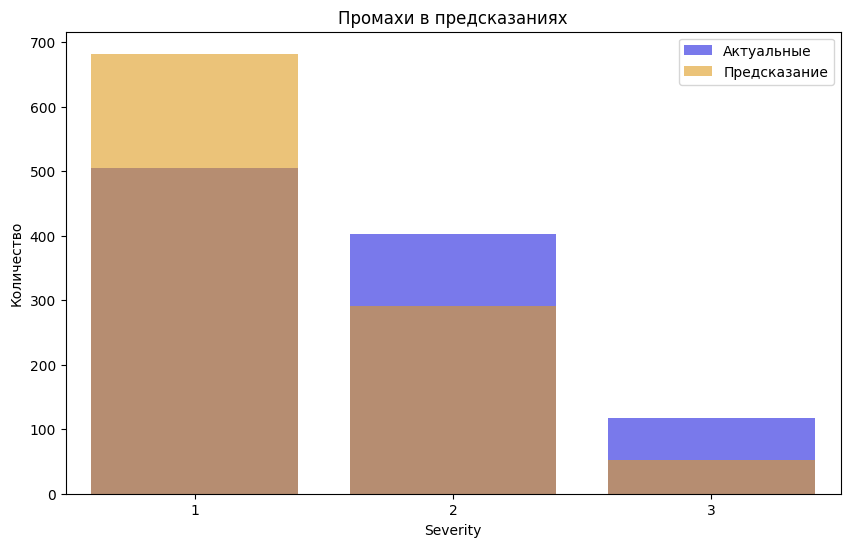

In [100]:
graph(X_test, Y_test, dt_cla_predictions)

In [101]:
# Decision Tree Classification
dtc_pipe = make_pipeline(DecisionTreeClassifier(random_state=0))
dtc_param = {
    'decisiontreeclassifier__max_depth': [5, 10, 20, None],  # None означает, что дерево будет расти до полной глубины
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 5, 10, 20],
    'decisiontreeclassifier__min_impurity_decrease': [0.0, 0.1, 0.2, 0.5],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],  # Минимальное количество образцов, необходимых для разделения узла
    'decisiontreeclassifier__max_features': ['auto', 'sqrt', 'log2', None],  # Количество признаков, используемых для поиска наилучшего разделения
    'decisiontreeclassifier__criterion': ['gini', 'entropy'],  # Критерий для оценки качества разбиения
    'decisiontreeclassifier__class_weight': [None, 'balanced'],  # Учитывать ли несбалансированные классы
    'decisiontreeclassifier__max_leaf_nodes': [None, 10, 20, 30],  # Максимальное количество листовых узлов
    'decisiontreeclassifier__min_weight_fraction_leaf': [0.0, 0.1],  # Минимальная доля веса, необходимая для листа
}

dtc_search = GridSearchCV(dtc_pipe, 
                         dtc_param,
                         scoring="f1_weighted",
                         n_jobs=-1,
                         cv = 5)
dtc_search.fit(X_train, Y_train)
print(f'Best Params: {dtc_search.best_params_} \nBest score: {dtc_search.best_score_}')

KeyboardInterrupt: 

## Random Forest Classification

              precision    recall  f1-score   support

           0       0.61      0.76      0.68       505
           1       0.53      0.42      0.47       403
           2       0.49      0.34      0.40       118

    accuracy                           0.58      1026
   macro avg       0.55      0.51      0.52      1026
weighted avg       0.57      0.58      0.57      1026

balanced_accuracy: 0.5069047090602992
roc_ovo_macro: 0.7548916458496168
roc_ovr_weighted: 0.7049526257607529


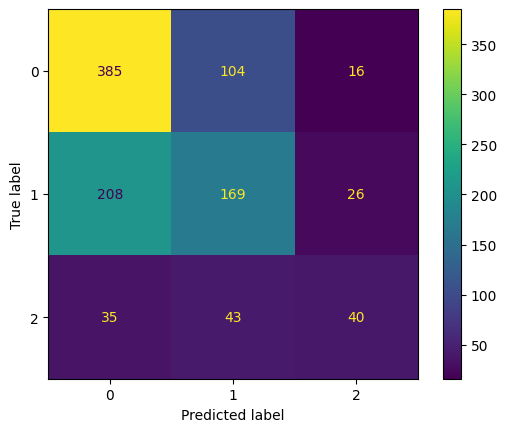

In [102]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classification
rf_cla = RandomForestClassifier()
rf_cla.fit(X_train, Y_train)
rf_cla_predictions = rf_cla.predict(X_test)
rf_cla_results = classification_report(Y_test, rf_cla_predictions, zero_division=True, output_dict=True)

# Confusion matrix and Classification report
ConfusionMatrixDisplay.from_estimator(rf_cla,X_test,Y_test)
print(classification_report(Y_test, rf_cla_predictions, zero_division=True))

# balanced_accuracy
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html#sklearn.metrics.balanced_accuracy_score
rf_cla_balanced_accuracy = balanced_accuracy_score(Y_test, rf_cla_predictions)
print(f'balanced_accuracy: {rf_cla_balanced_accuracy}')

# ROC_AUC score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
rf_cla_roc_ovo_macro = roc_auc_score(Y_test, rf_cla.predict_proba(X_test), multi_class='ovo', average='macro') #Insensitive to class imbalance when average == 'macro'
rf_cla_roc_ovr_weighted = roc_auc_score(Y_test, rf_cla.predict_proba(X_test), multi_class='ovr', average='weighted') #Sensitive to class imbalance even when average == 'macro'
print(f"roc_ovo_macro: {rf_cla_roc_ovo_macro}") 
print(f"roc_ovr_weighted: {rf_cla_roc_ovr_weighted}")

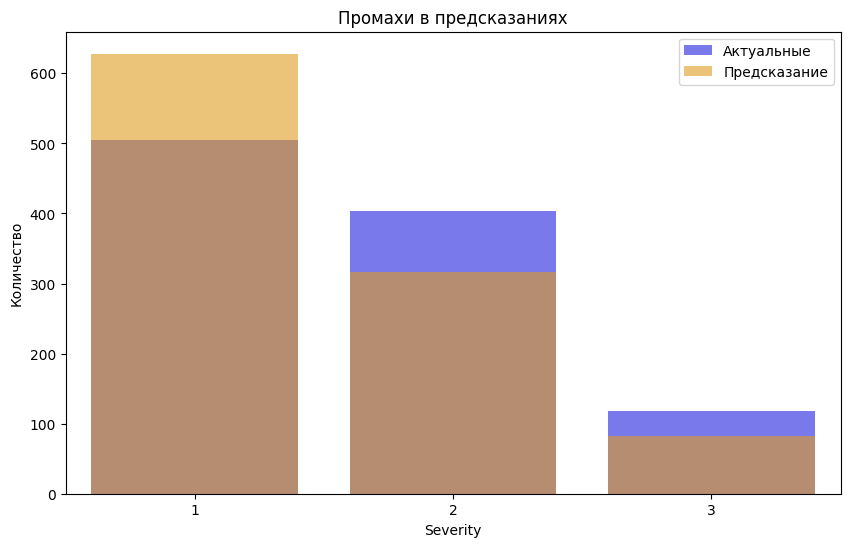

In [103]:
graph(X_test, Y_test, rf_cla_predictions)

In [68]:
# Random Forest Classification
rfc_pipe = make_pipeline(RandomForestClassifier(random_state=0))
rfc_param = {
    'randomforestclassifier__max_depth': [5, 10, 20, None],  # None означает, что деревья будут расти до полной глубины
    'randomforestclassifier__n_estimators': [50, 100, 200, 300],  # Количество деревьев в лесу
    'randomforestclassifier__min_impurity_decrease': [0.0, 0.1, 0.2, 0.5],
    'randomforestclassifier__min_samples_leaf': [1, 2, 5, 10, 20],  # Минимальное количество образцов, необходимых для листа
    'randomforestclassifier__min_samples_split': [2, 5, 10],
}


rfc_search = GridSearchCV(rfc_pipe, 
                         rfc_param,
                         scoring="f1_weighted",
                         n_jobs=-1,
                         cv = 5)
rfc_search.fit(X_train, Y_train)
print(f'Best Params: {rfc_search.best_params_} \nBest score: {rfc_search.best_score_}')

Best Params: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_impurity_decrease': 0.0, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 50} 
Best score: 0.5740678963965019


## Multi-layer Perceptron Classification

              precision    recall  f1-score   support

           0       0.56      0.82      0.66       660
           1       0.41      0.27      0.32       501
           2       1.00      0.00      0.00       131

    accuracy                           0.52      1292
   macro avg       0.66      0.36      0.33      1292
weighted avg       0.55      0.52      0.46      1292

balanced_accuracy: 0.36121696001935527
roc_ovo_macro: 0.6243891371393999
roc_ovr_weighted: 0.6023847076523766


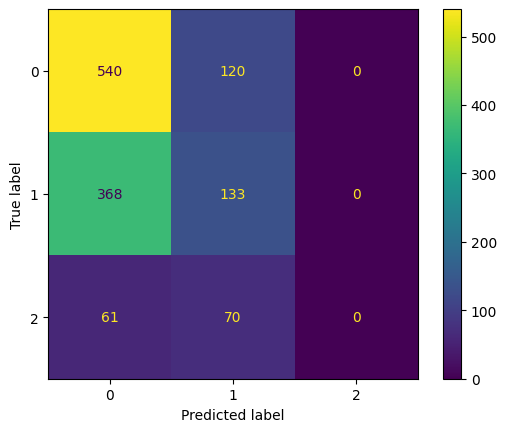

In [182]:
from sklearn.neural_network import MLPClassifier

# Multi-layer Perceptron classifier. 
mlpc_cla = MLPClassifier(activation='tanh', early_stopping=True, hidden_layer_sizes= (100, 100, 100), learning_rate='adaptive', nesterovs_momentum=True, random_state = 0)
mlpc_cla.fit(X_train, Y_train)
mlpc_cla_predictions = mlpc_cla.predict(X_test)
mlpc_cla_results = classification_report(Y_test, mlpc_cla_predictions, zero_division=True, output_dict=True)

# Confusion matrix and Classification report
ConfusionMatrixDisplay.from_estimator(mlpc_cla,X_test,Y_test)
print(classification_report(Y_test, mlpc_cla_predictions, zero_division=True))

# balanced_accuracy
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html#sklearn.metrics.balanced_accuracy_score
mlpc_cla_balanced_accuracy = balanced_accuracy_score(Y_test, mlpc_cla_predictions)
print(f'balanced_accuracy: {mlpc_cla_balanced_accuracy}')

# ROC_AUC score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
mlpc_cla_roc_ovo_macro = roc_auc_score(Y_test, mlpc_cla.predict_proba(X_test), multi_class='ovo', average='macro') #Insensitive to class imbalance when average == 'macro'
mlpc_cla_roc_ovr_weighted = roc_auc_score(Y_test, mlpc_cla.predict_proba(X_test), multi_class='ovr', average='weighted') #Sensitive to class imbalance even when average == 'macro'
print(f"roc_ovo_macro: {mlpc_cla_roc_ovo_macro}") 
print(f"roc_ovr_weighted: {mlpc_cla_roc_ovr_weighted}")

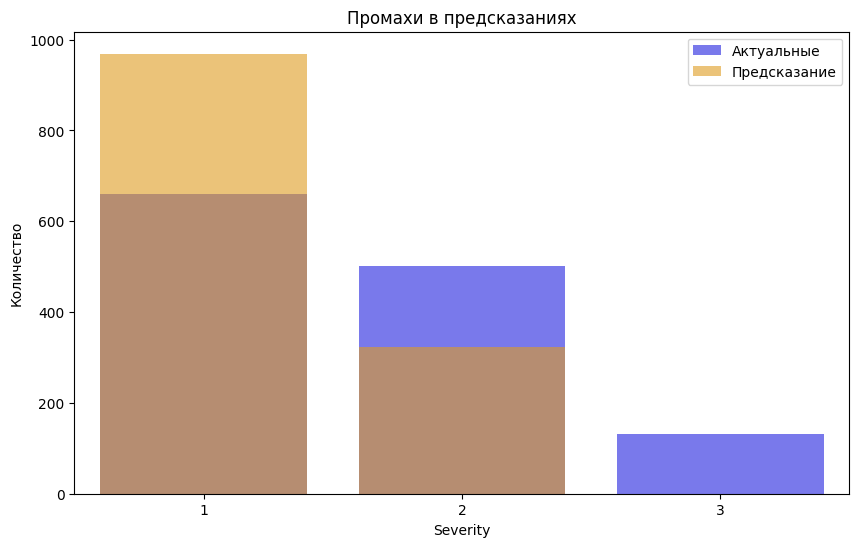

In [183]:
graph(X_test, Y_test, mlpc_cla_predictions)

In [103]:
# Multi-layer Perceptron classifier
mlpc_pipe = make_pipeline(MLPClassifier(random_state=0))
mlpc_param = {
    'mlpclassifier__activation': ['logistic', 'tanh', 'relu'],
    'mlpclassifier__hidden_layer_sizes': [
        (50,), 
        (100,), 
        (50, 50), 
        (100, 100), 
        (100, 50, 25), 
        (150,), 
        (100, 100, 100)
    ],
    'mlpclassifier__learning_rate': ['adaptive', 'constant'],
    'mlpclassifier__nesterovs_momentum': [True, False],
    'mlpclassifier__early_stopping': [True, False],
}

mlpc_search = GridSearchCV(mlpc_pipe, 
                         mlpc_param,
                         scoring="f1_weighted",
                         n_jobs=-1,
                         cv = 5)
mlpc_search.fit(X_train, Y_train)
print(f'Best Params: {mlpc_search.best_params_} \nBest score: {mlpc_search.best_score_}')

Best Params: {'mlpclassifier__activation': 'tanh', 'mlpclassifier__early_stopping': True, 'mlpclassifier__hidden_layer_sizes': (100, 100, 100), 'mlpclassifier__learning_rate': 'adaptive', 'mlpclassifier__nesterovs_momentum': True} 
Best score: 0.573190775374073


## AdaBoost Classifier

d:\Python\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.59      0.79      0.68       614
           1       0.49      0.30      0.37       469
           2       0.47      0.34      0.39       127

    accuracy                           0.56      1210
   macro avg       0.51      0.48      0.48      1210
weighted avg       0.54      0.56      0.53      1210

balanced_accuracy: 0.47871426859721683
roc_ovo_macro: 0.7707632506484116
roc_ovr_weighted: 0.6611718588188515


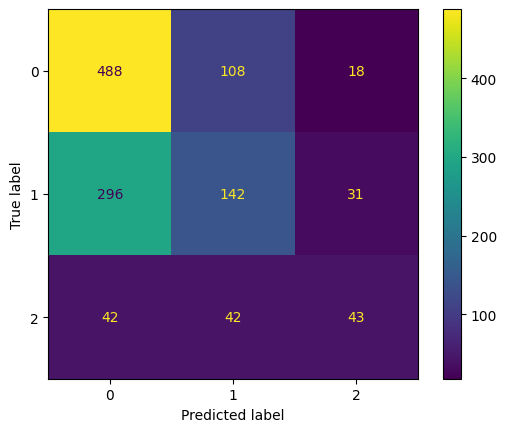

In [210]:
# load required classifer
from sklearn.ensemble import AdaBoostClassifier

abc =AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.5, n_estimators=50, random_state=0)
abc_model = abc.fit(X_train, Y_train)
abc_pred = abc_model.predict(X_test)
abc_cla_results = classification_report(Y_test, abc_pred, zero_division=True, output_dict=True)


# Confusion matrix and Classification report
ConfusionMatrixDisplay.from_estimator(abc_model,X_test,Y_test)
print(classification_report(Y_test, abc_pred, zero_division=True))


# balanced_accuracy
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html#sklearn.metrics.balanced_accuracy_score
abc_cla_balanced_accuracy = balanced_accuracy_score(Y_test, abc_pred)
print(f'balanced_accuracy: {abc_cla_balanced_accuracy}')

# ROC_AUC score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
abc_cla_roc_ovo_macro = roc_auc_score(Y_test, abc_model.predict_proba(X_test), multi_class='ovo', average='macro') #Insensitive to class imbalance when average == 'macro'
abc_cla_roc_ovr_weighted = roc_auc_score(Y_test, abc_model.predict_proba(X_test), multi_class='ovr', average='weighted') #Sensitive to class imbalance even when average == 'macro'
print(f"roc_ovo_macro: {abc_cla_roc_ovo_macro}") 
print(f"roc_ovr_weighted: {abc_cla_roc_ovr_weighted}")

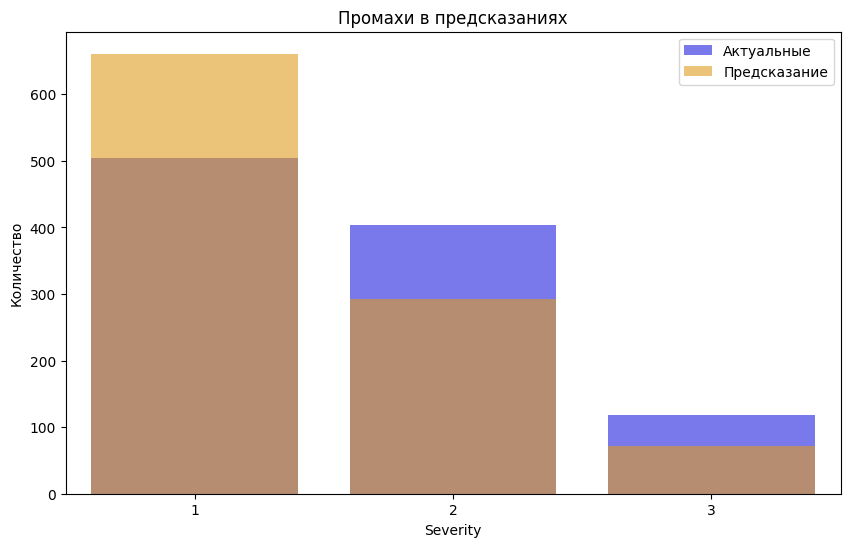

In [105]:
graph(X_test, Y_test, abc_pred)

In [202]:
# Multi-layer Perceptron classifier
abc_pipe = make_pipeline(AdaBoostClassifier(random_state=0))
abc_param = {
    'adaboostclassifier__n_estimators': [50, 100, 200, 300, 500],
    'adaboostclassifier__learning_rate': [0.01, 0.1, 0.5, 1.0, 2.0],
    'adaboostclassifier__algorithm': ['SAMME', 'SAMME.R'],
}

abc_search = GridSearchCV(abc_pipe, 
                         abc_param,
                         scoring="f1_weighted",
                         n_jobs=-1,
                         cv = 5)
abc_search.fit(X_train, Y_train)
print(f'Best Params: {abc_search.best_params_} \nBest score: {abc_search.best_score_}')

Best Params: {'adaboostclassifier__algorithm': 'SAMME.R', 'adaboostclassifier__learning_rate': 0.5, 'adaboostclassifier__n_estimators': 50} 
Best score: 0.5845151278785258


d:\Python\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [313]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(xgb_cla, file)

              precision    recall  f1-score   support

           0       0.67      0.86      0.76      2709
           1       0.68      0.52      0.59      2137
           2       0.74      0.46      0.56       604

    accuracy                           0.68      5450
   macro avg       0.70      0.61      0.64      5450
weighted avg       0.68      0.68      0.67      5450

balanced_accuracy: 0.611391420978539
roc_ovo_macro: 0.8614654896859317
roc_ovr_weighted: 0.8247655411410697


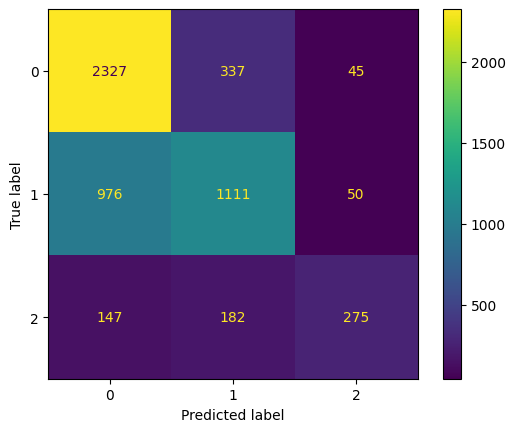

In [311]:
final_predictions = xgb_cla.predict(X_final)
final_results = classification_report(Y_final, final_predictions, zero_division=True, output_dict=True)

# Confusion matrix and Classification report
ConfusionMatrixDisplay.from_estimator(xgb_cla,X_final,Y_final)
print(classification_report(Y_final, final_predictions, zero_division=True))

# balanced_accuracy
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html#sklearn.metrics.balanced_accuracy_score
final_accuracy = balanced_accuracy_score(Y_final, final_predictions)
print(f'balanced_accuracy: {final_accuracy}')

# ROC_AUC score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
final_roc_ovo_macro = roc_auc_score(Y_final, xgb_cla.predict_proba(X_final), multi_class='ovo', average='macro') #Insensitive to class imbalance when average == 'macro'
final_roc_ovr_weighted = roc_auc_score(Y_final, xgb_cla.predict_proba(X_final), multi_class='ovr', average='weighted') #Sensitive to class imbalance even when average == 'macro'
print(f"roc_ovo_macro: {final_roc_ovo_macro}") 
print(f"roc_ovr_weighted: {final_roc_ovr_weighted}")

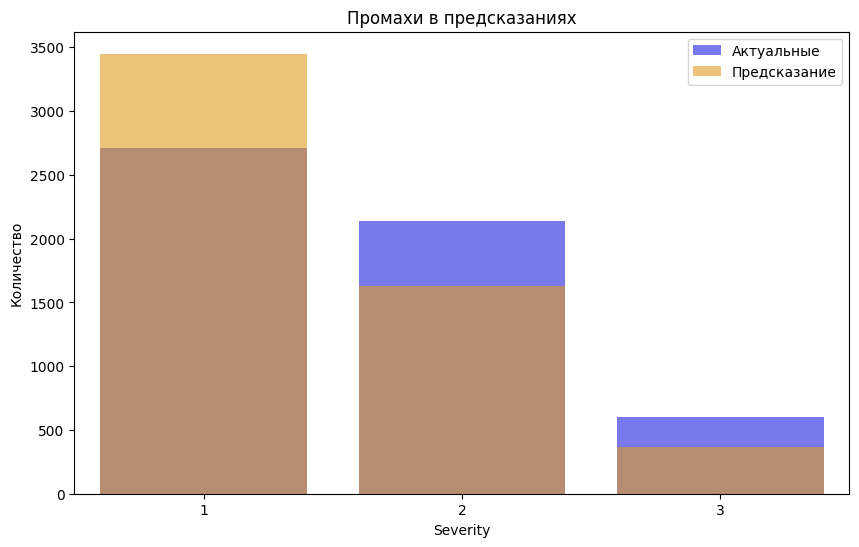

In [312]:
graph(X_final, Y_final, final_predictions)